In [522]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

#Import data
train = pd.read_csv("D:\Digit_recognizer\digit-recognizer/train.csv")
test = pd.read_csv("D:\Digit_recognizer\digit-recognizer/test.csv")

In [523]:
#Prepare X and Y from train data
X=train.drop(["label"],axis = 1)
Y=train.label

#Check train and test data for null
X.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [524]:
#Split train set into train and test
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.10,random_state=1)
#Need to convert train_x and train_y into np arrays. As model only accepts numpy arrays
train_x = train_x.values
train_y = train_y.values
test_x  = test_x.values
test_y  = test_y.values

In [525]:
#Normalize data (to reduce grayscale 0-255 illumination differences)
train_x=train_x/255.0
test_x=test_x/255.0
test=test/255.0

In [526]:
#Configure model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) 
model.compile(metrics=['accuracy'], optimizer='adam',loss='sparse_categorical_crossentropy') 

In [527]:
#Fit training data to the model
history=model.fit(train_x,train_y,epochs=15)

Epoch 1/15
37800/37800 [==============================] - 4s 104us/sample - loss: 0.3046 - acc: 0.9129
Epoch 2/15
37800/37800 [==============================] - 4s 94us/sample - loss: 0.1369 - acc: 0.9600
Epoch 3/15
37800/37800 [==============================] - 3s 90us/sample - loss: 0.0954 - acc: 0.9710
Epoch 4/15
37800/37800 [==============================] - 4s 96us/sample - loss: 0.0695 - acc: 0.9790
Epoch 5/15
37800/37800 [==============================] - 4s 94us/sample - loss: 0.0542 - acc: 0.9830
Epoch 6/15
37800/37800 [==============================] - 4s 101us/sample - loss: 0.0404 - acc: 0.9875
Epoch 7/15
37800/37800 [==============================] - 4s 101us/sample - loss: 0.0331 - acc: 0.9901
Epoch 8/15
37800/37800 [==============================] - 4s 97us/sample - loss: 0.0267 - acc: 0.9922
Epoch 9/15
37800/37800 [==============================] - 4s 97us/sample - loss: 0.0202 - acc: 0.9943
Epoch 10/15
37800/37800 [==============================] - 3s 91us/sample - los

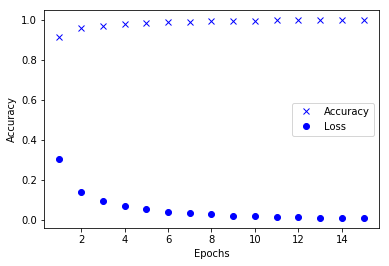

In [528]:
#Calc epochs efficiency:
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,'bx',label='Accuracy')
plt.plot(epochs,loss,'bo',label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [529]:
#Calc loss and accuracy on test(train-test) data:
test_loss,test_acc = model.evaluate(test_x, test_y)

4200/4200 [==============================] - 0s 81us/sample - loss: 0.1194 - acc: 0.9733


In [530]:
#Try test index predict vs actual
predictions  = model.predict(test_x)
idx = 34
print('Probability distribution:')
print(predictions[idx])
print('Predicted value:')
print(np.argmax(predictions[idx]))
print('Actual value:')
print(test_y[idx])

Probability distribution:
[1.4351167e-03 3.0757840e-12 3.8095199e-02 1.4773941e-06 2.3838484e-10
 8.8733107e-01 3.1265434e-02 1.2234032e-17 4.1871663e-02 2.5521043e-08]
Predicted value:
5
Actual value:
5


In [531]:
#Fail to predict correctly:
num_rows = test_x.shape[0]
predictions_label=[]     #convert predictions to labels
incorrect_predict_digit = [] 
incorrect_actual_digit = [] 
err_indx=[]
for i in range(num_rows):
    predicted_value = np.argmax(predictions[i])
    predictions_label.append(np.argmax(predictions[i]))
    actual_value = test_y[i]
    if predicted_value != actual_value:
        incorrect_predict_digit.append(predicted_value)
        incorrect_actual_digit.append(actual_value)
        err_indx.append(i)


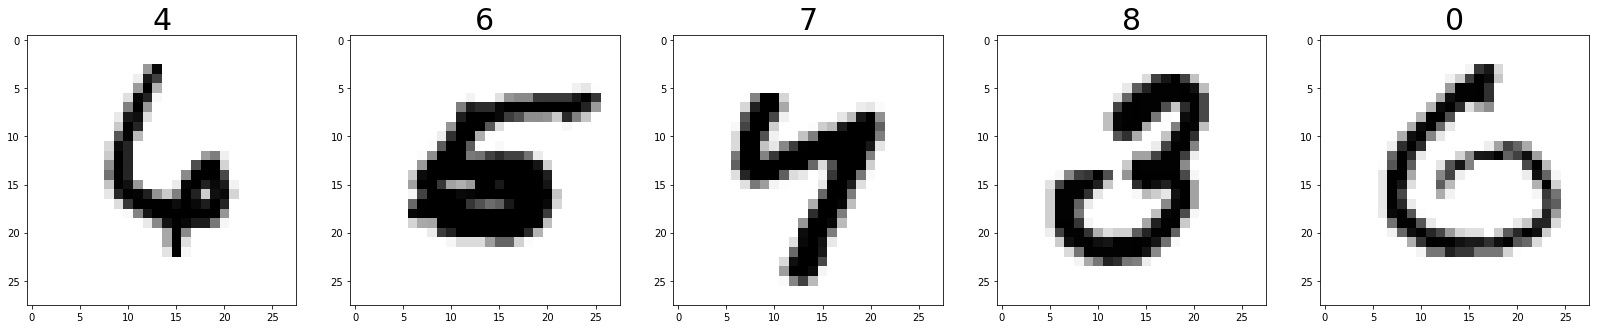

In [532]:
#First 5 wrong predictions:
plt.figure(figsize=(28,28))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.grid(False)
    plt.imshow(test_x[err_indx[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.title(predictions_label[err_indx[i]],fontsize= 30)
plt.show()

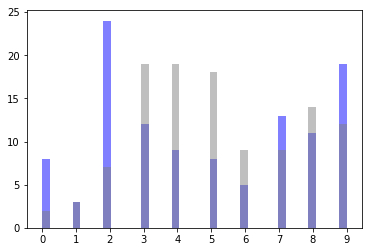

In [533]:
#Histogram fails predict vs actual:
plt.hist(incorrect_predict_digit,bins=40,color='blue', alpha=0.5)
plt.hist(incorrect_actual_digit,bins=40,color='gray', alpha=0.5)
plt.xticks(np.arange(10), range(10))
plt.show()

[[418   0   1   0   0   0   0   1   0   0]
 [  0 485   1   1   0   0   0   0   0   1]
 [  0   0 414   0   1   0   1   2   3   0]
 [  1   0   8 404   0   3   0   2   4   1]
 [  0   0   1   1 407   0   1   2   0  14]
 [  3   0   2   7   0 373   3   0   3   0]
 [  2   0   3   0   3   0 394   0   1   0]
 [  0   0   5   2   0   1   0 394   0   1]
 [  0   3   3   0   4   1   0   1 397   2]
 [  2   0   0   1   1   3   0   5   0 402]]


Text(95.305, 0.5, 'Actual')

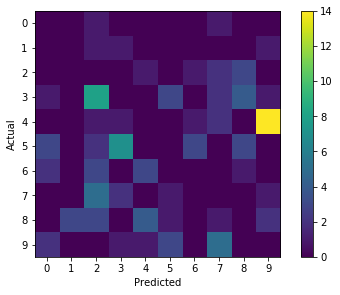

In [534]:
#Confusion matrix:
cm = confusion_matrix(test_y, predictions_label)
print(cm)

# Plot confusion matrix as an image:
for i in list(range(10)):
    cm[i,i] = 0   #remove corrects for clear view
plt.imshow(cm, interpolation='nearest', cmap='viridis')#cmap=plt.cm.Blues
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [568]:
#Output prediction for real test data:

predict_test = model.predict(test.values)
#convert predictions to labels
rws = test.shape[0]
prediction_test_label=[]    
for i in range(rws):
    prediction_test_label.append(np.argmax(predict_test[i]))

#idx = 300
#print('Probability distribution:')
#print(predict_test[idx])
#print('Predicted value:')
#print(np.argmax(predict_test[idx]))
#plt.figure(figsize=(28,28))
#plt.imshow(test.values[idx].reshape(28,28), cmap=plt.cm.binary)
#plt.title(np.argmax(predict_test[idx]),fontsize= 30)
#plt.show()

test_pred_result=pd.DataFrame(
    {'ImageId': list(range(1,28001)),
     'Label': prediction_test_label
    })

test_pred_result.to_csv('Evaluation_submission.csv', index=False)